In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

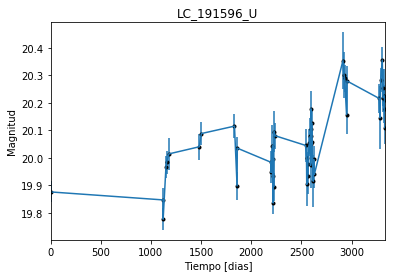

In [2]:
data = np.genfromtxt('LC_191596_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_191596_U')
plt.savefig("LC_191596_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

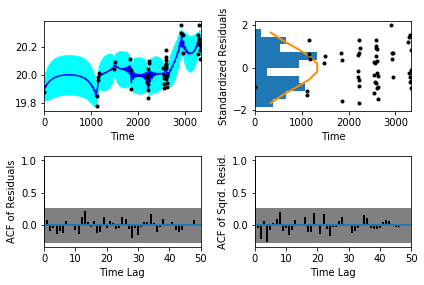

In [5]:
sample.assess_fit()

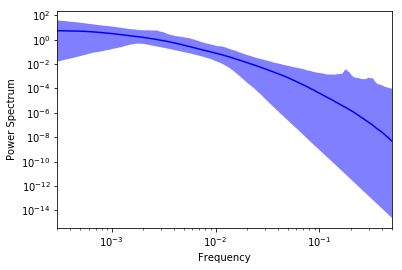

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

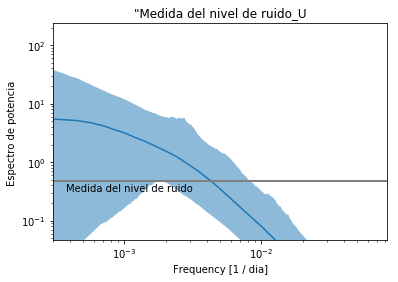

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_191596_U')
plt.title('"Medida del nivel de ruido_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_191596_U')

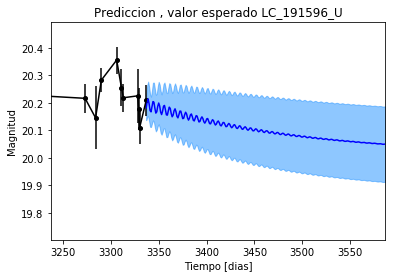

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_191596_U')

Text(0.5,1,'Prediccion, Caminos simulados  LC_191596_U')

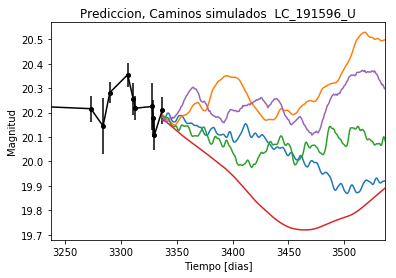

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_191596_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


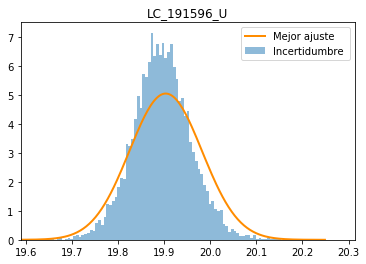

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_191596_U')
plt.savefig("Mejor_ajuste_LC_191596_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_191596_U')

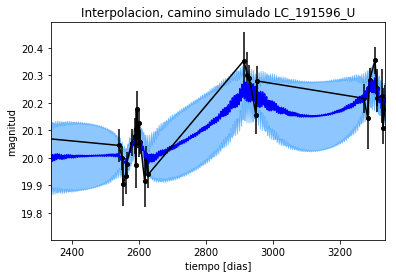

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_191596_U')

Text(0.5,1,'Interpolacion, camino simulado LC_191596_U')

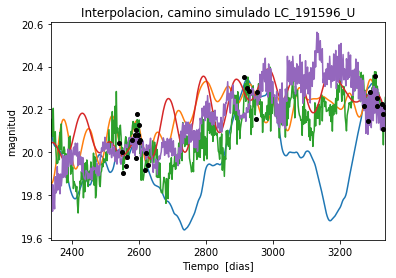

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_191596_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 534.454657643
Median: 0.0114366405992
Standard deviation: 0.181041415616
68% credibility interval: [ 0.00115063  0.15464794]
95% credibility interval: [  3.72323368e-04   7.26659769e-01]
99% credibility interval: [  3.19083442e-04   9.35664889e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 615.742221804
Median: 0.00521646808192
Standard deviation: 0.0831696917338
68% credibility interval: [ 0.00082821  0.04080343]
95% credibility interval: [ 0.00036238  0.26424382]
99% credibility interval: [  3.15385044e-04   6.08898376e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 507.22793273
Median: 0.0636149795251
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1395.50432524
Median: 71.4070876774
Standard deviation: 1.71643218375
68% credibility interval: [ 69.55923441  72.65101559]
95% credibility interval: [ 66.91552668  73.93978568]
99% credibility interval: [ 64.94079417  74.56881346]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 529.935740995
Median: 0.990204685116
Standard deviation: 2.25523274851
68% credibility interval: [ 0.1504473   4.40216896]
95% credibility interval: [ 0.03224793  7.68216302]
99% credibility interval: [  0.01589606  10.19231159]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 550.189538196
Median: 1.29405331898
Standard deviation: 9.75696601194
68% credibility interval: [  0.04429496  12.77955496]
95% credibility interval: [  6.46005349

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 829.920936532
Median: 4.78444188148e-34
Standard deviation: 1.12578293314e+151
68% credibility interval: [  2.63861635e-97   1.04870570e+11]
95% credibility interval: [  1.56909379e-147   4.58932513e+147]
99% credibility interval: [  8.05856684e-152   1.51135072e+150]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1732.95529831
Median: 20.0450024892
Standard deviation: 0.0683590866578
68% credibility interval: [ 19.98446298  20.09984296]
95% credibility interval: [ 19.89570718  20.16254633]
99% credibility interval: [ 19.79457249  20.23183301]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 453.779397574
Median: 0.0454135014006
Standard deviation: 0.264861999698
68% credibility interval: [ 0.          0.46138215]
95% credibility interval: [ 0.          0.90025362]
99% credibility interval: [ 0.          0.98561067]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 453.779397574
Median: 0.0454135014006
Standard deviation: 0.264861999698
68% credibility interval: [ 0.          0.46138215]
95% credibility interval: [ 0.          0.90025362]
99% credibility interval: [ 0.          0.98561067]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 362.017301254
Median: 0.0
Standard deviation: 0.00112015512096
68% cre

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1395.50432524
Median: 71.4070876774
Standard deviation: 1.71643218375
68% credibility interval: [ 69.55923441  72.65101559]
95% credibility interval: [ 66.91552668  73.93978568]
99% credibility interval: [ 64.94079417  74.56881346]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1218.18957046
Median: 0.0244019553463
Standard deviation: 0.0195588473996
68% credibility interval: [ 0.01539703  0.04420638]
95% credibility interval: [ 0.01035685  0.08139607]
99% credibility interval: [ 0.00834168  0.12592911]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1624.35152507
Median: 1.0657064761
Standard deviation: 0.189084243589
68% credibility interval: [ 0.89973422  1.2685312 ]
95% credibility interval: [ 0.76891395  1.50100805]
99% credibility interval: [ 0.67821167  1.66419828]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 815.499365494
Median: 0.00160845751386
Standard deviation: 0.32233381357
68% credibility interval: [  8.32009313e-16   7.39002560e-02]
95% credibility interval: [  4.89871339e-150   1.02695913e+000]
99% credibility interval: [  1.22974702e-153   2.22977282e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 534.454657643
Median: (-0.0718585321766-0.78636729846j)
Standard deviation: 2.01579501822
68% credibility interval: [-0.97168165-5.32352165j -0.00722962-0.07325702j]
95% credibility interval: [ -4.56573798e+00+0.j          -2.33937672e-03-2.02447425j]
99% credibility interval: [ -5.87895589e+00+0.j          -2.00486039e-03-5.02871616j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 615.742221804
Median: (-0.0327760356077+0.243871687188j)
Standard deviation: 1.74429504005
68% credibility interval: [-0.25637552+0.90018655j -0.00520378+4.32227689j]
95% credibility interval: [-1.66029291+6.08554295j -0.00227691+0.01732767j]
99% credibility interval: [ -3.82582133e+00+0.56801864j  -1.98162268e-03+0.02177643j]
Posterior sum